# Peak detection

In [5]:
oxi = oxi[1]
triggers = triggers[1][:-1]
peaks = oxi_peaks(oxi, resample=False)

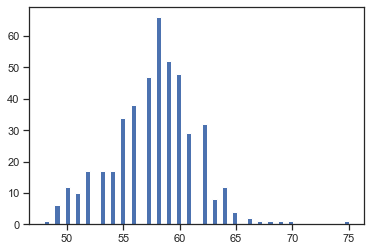

In [6]:
plt.hist(np.diff(np.where(peaks == 1)[0]), bins=60);

In [7]:
hr, time = heart_rate(peaks, sfreq=75, unit='bpm', method='staircase')

In [8]:
len(time), len(hr), len(peaks), len(triggers)

(26478, 26478, 26478, 26478)

(10, 30)

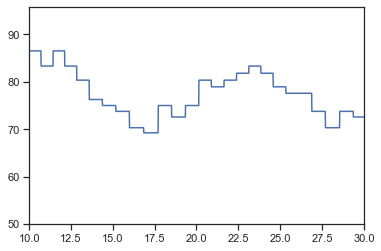

In [9]:
plt.plot(time, hr)
plt.xlim(10, 30)

Trial start is indexed by a **2**, response is provided at **3** and trials ends at **4** (only if confidence rating was provided).

In [10]:
# Check for trial numbers
sum(np.asarray(triggers) == 2)

50

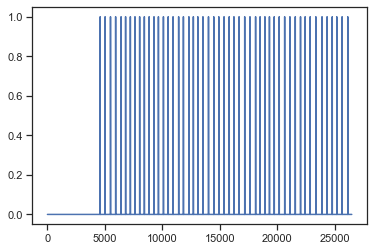

In [11]:
plt.plot(np.asarray(triggers) == 2)

# Trial length

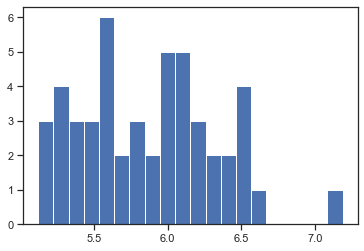

In [12]:
plt.hist(np.diff(np.where(np.asarray(triggers) == 2)[0]) / 75, bins=20);

# Epoch trials

In [13]:
epoch = to_epochs(hr, np.asarray(triggers), sfreq=75, event_idx=2, tmax=10)

1 trial(s) droped due to inconsistent recording


In [14]:
np.asarray(epoch).shape

(50, 825)

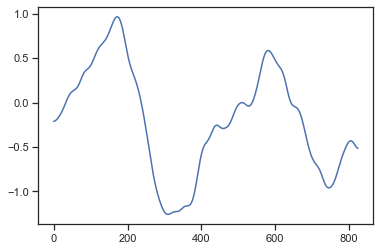

In [15]:
plt.plot(np.asarray(epoch).mean(0));